# 1) Introduction

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from langchain.text_splitter import RecursiveCharacterTextSplitter
from pinecone import Pinecone




# 2) How Machines Measure "Closeness"

In [6]:
def cosine_similarity(vec1, vec2):
    dot = np.dot(vec1, vec2)
    return dot / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

In [7]:
A = np.array([1, 2])
B = np.array([-2, 1])
cosine_similarity(A, B)

np.float64(0.0)

Plot saved as 'perpendicular_vectors.png'


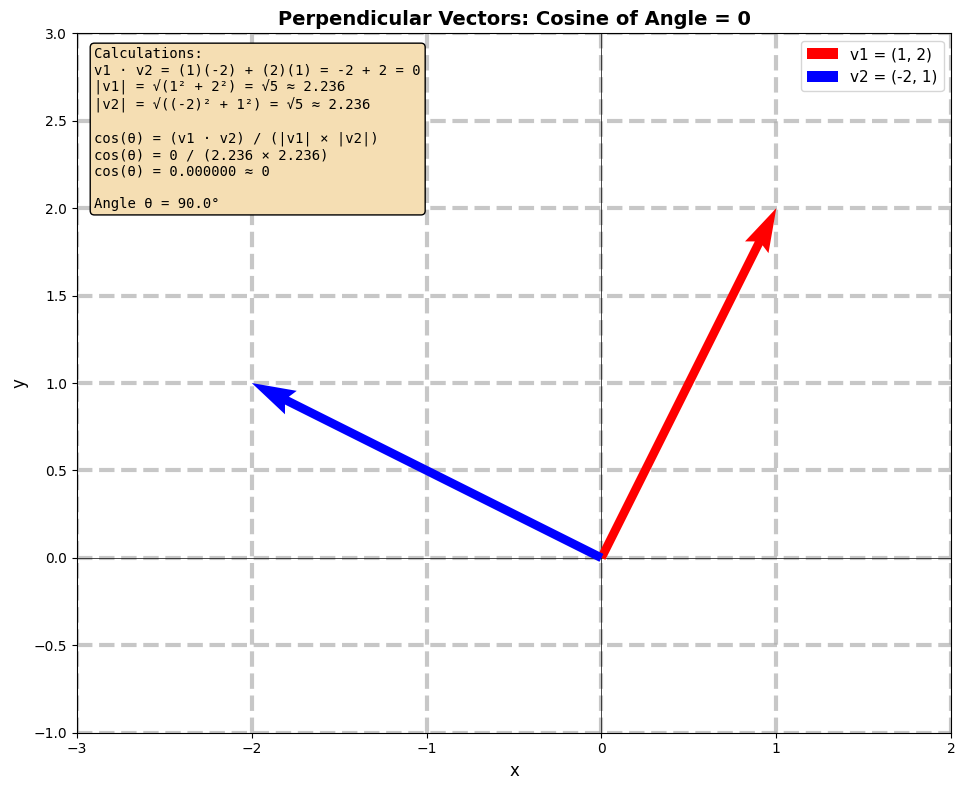


Vector v1: [1 2]
Vector v2: [-2  1]

Dot product: 0
Cosine of angle: 0.0
Angle: 90.0°

Since the dot product is 0, the vectors are perpendicular!


In [8]:

# Define vectors
v1 = np.array([1, 2])
v2 = np.array([-2, 1])

# Calculate dot product
dot_product = np.dot(v1, v2)

# Calculate magnitudes
mag_v1 = np.linalg.norm(v1)
mag_v2 = np.linalg.norm(v2)

# Calculate cosine of angle
cos_angle = dot_product / (mag_v1 * mag_v2)

# Calculate angle in degrees
angle_rad = np.arccos(np.clip(cos_angle, -1, 1))
angle_deg = np.degrees(angle_rad)

# Create plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot vectors
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, 
          color='red', width=0.01, label=f'v1 = (1, 2)', zorder=3)
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, 
          color='blue', width=0.01, label=f'v2 = (-2, 1)', zorder=3)

# Add grid
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

# Set equal aspect ratio and limits
ax.set_aspect('equal')
ax.set_xlim(-3, 2)
ax.set_ylim(-1, 3)

# Labels and title
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Perpendicular Vectors: Cosine of Angle = 0', fontsize=14, fontweight='bold')

# Add legend
ax.legend(fontsize=11, loc='upper right')

# Add text box with calculations
textstr = f'''Calculations:
v1 · v2 = (1)(-2) + (2)(1) = -2 + 2 = {dot_product}
|v1| = √(1² + 2²) = √5 ≈ {mag_v1:.3f}
|v2| = √((-2)² + 1²) = √5 ≈ {mag_v2:.3f}

cos(θ) = (v1 · v2) / (|v1| × |v2|)
cos(θ) = {dot_product} / ({mag_v1:.3f} × {mag_v2:.3f})
cos(θ) = {cos_angle:.6f} ≈ 0

Angle θ = {angle_deg:.1f}°'''

props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, family='monospace')

plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=3, alpha=0.7)
# Save the figure to local device
plt.savefig('perpendicular_vectors.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'perpendicular_vectors.png'")

plt.show()

print(f"\nVector v1: {v1}")
print(f"Vector v2: {v2}")
print(f"\nDot product: {dot_product}")
print(f"Cosine of angle: {cos_angle}")
print(f"Angle: {angle_deg:.1f}°")
print(f"\nSince the dot product is 0, the vectors are perpendicular!")

# 3) Preparing Our Text with LangChain

In [9]:
text = """A photorealistic image of a green domestic cat in a professionally engineered astronaut suit on the Moon. The cat is on all four legs in a haunting, predatory crouch — body low to the ground, hind legs coiled as if ready to spring, forepaws splayed on the regolith, muscles visibly tense through the suit, tail low and slightly twitching, ears flattened, pupils narrow and focused; gaze intense and fixed toward the horizon. Fur is natural moss-green (muted, not neon) with believable microtexture and subtle lunar dust clinging to the paws and suit cuffs. The NASA-style extravehicular suit is authentic: realistic fabric, seams, connectors, mission patch, and faint dust; clear visor shows the cat’s face and eye reflections (Earth and lunar horizon). Lunar surface: fine regolith texture, small rocks, paw prints and astronaut footprints nearby. Lighting: hard, low-angle lunar sunlight creating long, crisp shadows and a dramatic rim light highlighting the cat’s silhouette; subtle fill from reflected regolith. Camera: photorealistic 50mm-equivalent, shallow-medium depth of field (f/4–f/8) to keep cat and background readable; high resolution, natural color grading, filmic contrast. Mood: eerie, documentary-style, believable—looks like a real photograph capturing a tense, predatory moment on the Moon. Render details: ultra-detailed fur and fabric microtexture, realistic specular highlights on the visor, correct perspective and scale, no cartoon stylization, cat must remain quadrupedal and non-anthropomorphic."""

In [10]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=0,
    separators = [". "],
    keep_separator=False
    #separators=["\n\n", "\n", ". ", "! ", "? ", " ", "", " \n"]  
)




In [11]:
splitted_texts = text_splitter.split_text(text)

In [12]:
splitted_texts

['A photorealistic image of a green domestic cat in a professionally engineered astronaut suit on the Moon',
 'The cat is on all four legs in a haunting, predatory crouch — body low to the ground, hind legs coiled as if ready to spring, forepaws splayed on the regolith, muscles visibly tense through the suit, tail low and slightly twitching, ears flattened, pupils narrow and focused; gaze intense and fixed toward the horizon',
 'Fur is natural moss-green (muted, not neon) with believable microtexture and subtle lunar dust clinging to the paws and suit cuffs',
 'The NASA-style extravehicular suit is authentic: realistic fabric, seams, connectors, mission patch, and faint dust; clear visor shows the cat’s face and eye reflections (Earth and lunar horizon)',
 'Lunar surface: fine regolith texture, small rocks, paw prints and astronaut footprints nearby',
 'Lighting: hard, low-angle lunar sunlight creating long, crisp shadows and a dramatic rim light highlighting the cat’s silhouette; subt

In [13]:
len(splitted_texts)

9

# 4) Storing Our Embeddings On-the-Fly in Pinecone

In [ ]:


# --- 1. Configuration ---
# It's best practice to use environment variables, but for clarity, we show them here.PINECONE_API_KEY = "<YOUR_API_KEY>"
PINECONE_API_KEY = "<YOUR_API_KEY>"
PINECONE_INDEX_NAME  = "my-first-index"

# --- 2. Initialization ---
# This creates our client object to interact with the Pinecone service.
pc = Pinecone(api_key=PINECONE_API_KEY)

# --- 3. Safety Check and Creation ---
# This 'if' block prevents errors by only creating the index if it's missing.
if not pc.has_index(PINECONE_INDEX_NAME):
    # This is the key function for our workflow!
    pc.create_index_for_model(
        name=PINECONE_INDEX_NAME,
        cloud="aws",
        region="us-east-1",
        embed={
            "model":"llama-text-embed-v2",
            "field_map":{"text": "text"}
        }
    )
    print(f"Created index '{PINECONE_INDEX_NAME}'.")
else:
    print(f"The index '{PINECONE_INDEX_NAME}' already exists.")

The index 'my-first-index' already exists.


In [15]:
def prepare_texts_for_pinecone(text_chunks: list[str], source_identifier: str) -> list[dict]:
    """Formats text chunks into a list of records for Pinecone upserting.

    This function creates a unique ID and metadata for each text chunk,
    structuring it in the format required by Pinecone's `upsert_records`
    method when using server-side embeddings.

    Args:
        text_chunks (list[str]): The list of text snippets to prepare.
        source_identifier (str): A unique name for the document source.

    Returns:
        list[dict]: A list of formatted records, ready for upload.
    """
    records_for_pinecone = []
    for i, text in enumerate(text_chunks):
        # Create a simple, unique ID based on the source and chunk index
        record_id = f"{source_identifier}-{i}"

        # Create the dictionary in the standard Pinecone upsert format
        record = {
            "id": record_id,
            "source": source_identifier,
            "chunk_index": i,
            "text": text  # The original text is stored in the metadata
        }
        records_for_pinecone.append(record)

    print(f"Source '{source_identifier}' prepared into {len(records_for_pinecone)} records for Pinecone.")
    return records_for_pinecone

In [16]:
texts_for_pinecone = prepare_texts_for_pinecone(splitted_texts, "prompt-chunk")

Source 'prompt-chunk' prepared into 9 records for Pinecone.


In [17]:
texts_for_pinecone

[{'id': 'prompt-chunk-0',
  'source': 'prompt-chunk',
  'chunk_index': 0,
  'text': 'A photorealistic image of a green domestic cat in a professionally engineered astronaut suit on the Moon'},
 {'id': 'prompt-chunk-1',
  'source': 'prompt-chunk',
  'chunk_index': 1,
  'text': 'The cat is on all four legs in a haunting, predatory crouch — body low to the ground, hind legs coiled as if ready to spring, forepaws splayed on the regolith, muscles visibly tense through the suit, tail low and slightly twitching, ears flattened, pupils narrow and focused; gaze intense and fixed toward the horizon'},
 {'id': 'prompt-chunk-2',
  'source': 'prompt-chunk',
  'chunk_index': 2,
  'text': 'Fur is natural moss-green (muted, not neon) with believable microtexture and subtle lunar dust clinging to the paws and suit cuffs'},
 {'id': 'prompt-chunk-3',
  'source': 'prompt-chunk',
  'chunk_index': 3,
  'text': 'The NASA-style extravehicular suit is authentic: realistic fabric, seams, connectors, mission pat

In [18]:
NAMESPACE = "fpc-namespace" 

In [19]:
from tqdm.auto import tqdm

In [20]:
def initialize_pinecone(api_key, index_name):
    """Initializes Pinecone and connects to the specified index."""
    pc = Pinecone(api_key=api_key)
    # Check that the index exists. Your creation script already handles this,
    # but it's a good security practice.
    if index_name not in pc.list_indexes().names():
        raise ValueError(f"The index '{index_name}' does not exist. Please create it first.")
    
    print(f"Connected to existing index '{index_name}'.")
    return pc.Index(index_name)

In [21]:
index = initialize_pinecone(PINECONE_API_KEY, PINECONE_INDEX_NAME)

Connected to existing index 'my-first-index'.


In [22]:
index.describe_index_stats()

{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'fpc-namespace': {'vector_count': 9}},
 'total_vector_count': 9,
 'vector_type': 'dense'}

In [24]:
def upload_to_pinecone(index, chunks_for_pinecone, namespace="default"):
    """Uploads data to Pinecone in batches. Pinecone will generate the embeddings."""
    batch_size = 100
    print(f"Uploading {len(chunks_for_pinecone)} documents to Pinecone in batches of {batch_size}...")

    for i in tqdm(range(0, len(chunks_for_pinecone), batch_size)):
        i_end = min(i + batch_size, len(chunks_for_pinecone))
        batch = chunks_for_pinecone[i:i_end]
        
        # The format for upsert is a list of dictionaries.
        # We do not pass "values" (the vector) since we are using server-side embeddings with upsert_records.
        index.upsert_records(records=batch, namespace=namespace)
        
    print("Upload to Pinecone completed!")

In [25]:
upload_to_pinecone(index, texts_for_pinecone, NAMESPACE)

Uploading 9 documents to Pinecone in batches of 100...


  0%|          | 0/1 [00:00<?, ?it/s]

Upload to Pinecone completed!


In [26]:
index.describe_index_stats()

{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'fpc-namespace': {'vector_count': 9}},
 'total_vector_count': 9,
 'vector_type': 'dense'}

# 5) Part 5: Querying Our Vector Database for Semantic Similarity

In [44]:
QUERY = "the creature's intense color"

retrieved_contexts = index.search(
    namespace=NAMESPACE, 
    query={
        "inputs": {"text": QUERY}, 
        "top_k": 5
    },
    fields=["text"],
)

In [45]:
retrieved_contexts

{'result': {'hits': [{'_id': 'prompt-chunk-2',
                      '_score': 0.3494497537612915,
                      'fields': {'text': 'Fur is natural moss-green (muted, '
                                         'not neon) with believable '
                                         'microtexture and subtle lunar dust '
                                         'clinging to the paws and suit '
                                         'cuffs'}},
                     {'_id': 'prompt-chunk-1',
                      '_score': 0.28646236658096313,
                      'fields': {'text': 'The cat is on all four legs in a '
                                         'haunting, predatory crouch — body '
                                         'low to the ground, hind legs coiled '
                                         'as if ready to spring, forepaws '
                                         'splayed on the regolith, muscles '
                                         'visibly tense thro

In [46]:
def display_search_results(results, query_text=""):
    """
    Beautifully displays Pinecone search results.
    
    Args:
        results (dict): The results dictionary returned from index.search()
                       with structure: {'result': {'hits': [...]}, 'usage': {...}}
        query_text (str): Optional query text to display as header
    """
    print("=" * 100)
    if query_text:
        print(f"🔍 SEARCH QUERY: '{query_text}'")
    print("=" * 100)
    
    # Extract hits from the nested structure
    if not results or 'result' not in results or 'hits' not in results['result']:
        print("❌ No results found.")
        return
    
    hits = results['result']['hits']
    
    if len(hits) == 0:
        print("❌ No results found.")
        return
    
    print(f"\n✅ Found {len(hits)} results\n")
    
    for idx, hit in enumerate(hits, 1):
        print(f"{'─' * 100}")
        print(f"📄 RESULT #{idx}")
        print(f"{'─' * 100}")
        print(f"🆔 ID:           {hit.get('_id', 'N/A')}")
        print(f"📊 Score:        {hit.get('_score', 0):.6f}")
        
        # Display fields
        if 'fields' in hit and hit['fields']:
            print(f"\n📋 Fields:")
            for key, value in hit['fields'].items():
                if key == 'text':
                    print(f"   📝 {key}:")
                    text_value = str(value)
                    # Wrap text at 90 characters for better readability
                    words = text_value.split()
                    line = "      "
                    for word in words:
                        if len(line) + len(word) + 1 <= 94:
                            line += word + " "
                        else:
                            print(line.rstrip())
                            line = "      " + word + " "
                    if line.strip():
                        print(line.rstrip())
                else:
                    print(f"   • {key}: {value}")
        
        print()
    
    print("=" * 100)

In [47]:
# Display the search results beautifully
display_search_results(results, query_text="the creature's intense color")

🔍 SEARCH QUERY: 'the creature's intense color'

✅ Found 5 results

────────────────────────────────────────────────────────────────────────────────────────────────────
📄 RESULT #1
────────────────────────────────────────────────────────────────────────────────────────────────────
🆔 ID:           prompt-chunk-2
📊 Score:        0.349450

📋 Fields:
   📝 text:
      Fur is natural moss-green (muted, not neon) with believable microtexture and subtle
      lunar dust clinging to the paws and suit cuffs

────────────────────────────────────────────────────────────────────────────────────────────────────
📄 RESULT #2
────────────────────────────────────────────────────────────────────────────────────────────────────
🆔 ID:           prompt-chunk-1
📊 Score:        0.286462

📋 Fields:
   📝 text:
      The cat is on all four legs in a haunting, predatory crouch — body low to the ground,
      hind legs coiled as if ready to spring, forepaws splayed on the regolith, muscles
      visibly tense throu